---
title: "16-Cox回归与比例风险假定检验"
subtitle: "Cox regression and Proportional Hazard assumptions"
author: "Simon Zhou"
date: "2025-05-08"
format: 
    html:
        code-fold: false
        fig_caption: true
        number-sections: true
        toc: true
        toc-depth: 2
---

In [1]:
import stata_setup
stata_setup.config('C:/Program Files/Stata18', 'mp', splash=False)

## 数据导入

在一个抗癌药物的Clinical Trial中，48名患者被随机分配到新药组(28人)和安慰剂组(20人)，研究人员想知道新药是否影响患者的生存情况。

Data：**Patient Survival in Drug Trial**

In [2]:
%%stata
webuse drugtr,clear

(Patient survival in drug trial)


## Cox回归

Cox回归分析，也称为比例风险回归模型（Proportional Hazards Model，简称Cox模型），是由英国统计学家D.R.Cox于1972年提出的一种半参数回归模型。

该模型主要用于生存分析，能够同时分析多个因素对生存期的影响，并且可以处理带有截尾生存时间的数据。

### 基本概念

在介绍Cox回归模型之前，需要了解几个相关的概念：

- 生存函数：表示观察对象的生存时间大于某时刻的概率。
- 死亡函数：表示观察对象的生存时间不大于某时刻的概率。
- 死亡密度函数：表示观察对象在某时刻的瞬时死亡率。
- 危险率函数：表示生存时间已达到某时刻的观察对象在该时刻的瞬时死亡率1。

### 基本原理

Cox回归模型的基本形式为：
$$h(t|X) = h_0(t) \exp(\beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p)$$ 

其中， $h(t|X)$ 是在给定协变量 $X$ 时的危险率，$h_0(t)$ 是基准危险率，$\beta_i$ 是需要估计的回归系数。

### Cox回归模型的假设包括：

- 比例风险假设：各危险因素的作用不随时间变化。
- 对数线性假设：协变量与对数风险比呈线性关系。

### 偏回归系数的意义

偏回归系数 $\beta_i$ 的流行病学含义是在其他协变量不变的情况下，协变量每增加一个测定单位时所引起的相对危险度的自然对数的改变量。

### 假设检验

Cox回归模型中的偏回归系数可以通过建立偏似然函数，利用Newton-Raphson迭代法求得。常用的假设检验方法包括似然比检验、Wald检验和记分检验。

Cox回归模型由于其灵活性和广泛应用，成为生存分析中最常用的多因素分析方法之一。

In [3]:
%%stata
stcox drug


        Failure _d: died
  Analysis time _t: studytime

Iteration 0:  Log likelihood = -99.911448
Iteration 1:  Log likelihood = -88.254734
Iteration 2:  Log likelihood = -88.001551
Iteration 3:  Log likelihood =  -88.00019
Refining estimates:
Iteration 0:  Log likelihood =  -88.00019

Cox regression with Breslow method for ties

No. of subjects =  48                                   Number of obs =     48
No. of failures =  31
Time at risk    = 744
                                                        LR chi2(1)    =  23.82
Log likelihood = -88.00019                              Prob > chi2   = 0.0000

------------------------------------------------------------------------------
          _t | Haz. ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
        drug |   .1327581   .0584002    -4.59   0.000     .0560555    .3144157
---------------------------------------------------------------------

这里 Drug 的 coefficient($\beta$) : 新药组终点事件发生风险是安慰剂组的 13.3%(95% CI: 5.6%,31.4%)

控制年龄：

In [4]:
%%stata
stcox drug age


        Failure _d: died
  Analysis time _t: studytime

Iteration 0:  Log likelihood = -99.911448
Iteration 1:  Log likelihood = -83.551879
Iteration 2:  Log likelihood = -83.324009
Iteration 3:  Log likelihood = -83.323546
Refining estimates:
Iteration 0:  Log likelihood = -83.323546

Cox regression with Breslow method for ties

No. of subjects =  48                                   Number of obs =     48
No. of failures =  31
Time at risk    = 744
                                                        LR chi2(2)    =  33.18
Log likelihood = -83.323546                             Prob > chi2   = 0.0000

------------------------------------------------------------------------------
          _t | Haz. ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
        drug |   .1048772   .0477017    -4.96   0.000     .0430057    .2557622
         age |   1.120325   .0417711     3.05   0.002     1.041375   

这里 Drug 的 coefficient($\beta_1$) : **在控制了患者的年龄后**，新药组终点事件发生风险是安慰剂组的 10.5%(95% CI: 4.3%,25.6%)

反过来，这里 Age 的 coefficient($\beta_2$) : **在控制了治疗方法后**，患者年龄每增加 1 岁，发生终点事件风险增加 12%(95% CI: 4.1%,20.5%)

### Cox回归的命令语法

```stata
stcox var1 var2 var3 ... [if] [in] [, options]
```
**Notice**

1. 必须要在指定Data为Suvivaldata之后(`stset`之后)才能使用任何`st`开头的命令
2. 由于我们已经在一开始将数据转化为Survivaldata的时候指定过终点事件(Failure variable)、时间变量(Time variable)，我们在这里只需要设置需要在回归方程中independent variable即可
3. Example
    - `stcox drug age`
    - `stcox drug age if age < 50`

## PH 假定检验

### 使用统计检验法
Cox回归模型在应用时，有一个非常重要的前提条件，即比例风险（Proportional hazards）假定，简称PH假定。

**Notice**:PH假定的检验基于上一步进行的Cox回归。

$H_0$：纳入Cox回归模型的变量满足PH假定

$P>0.05$，不能拒绝$H_0$

In [5]:
%%stata
estat phtest


Test of proportional-hazards assumption

Time function: Analysis time
------------------------------------------------
             |     chi2       df       Prob>chi2
-------------+----------------------------------
 Global test |     0.43        2          0.8064
------------------------------------------------


### PH假定 使用图像法

使用- ln(-ln(生存))图法，判断标准是如果待评价的变量分成的亚组曲线平行或近似平行，则满足PH假定。

```stata
stphplot,by(bar1) adjust(var2 var3)
```

`var1` 是自变量名，`var2` 等是希望控制的变量。

**Notice**:这个命令不一定要跟在cox回归之后


        Failure _d: died
  Analysis time _t: studytime


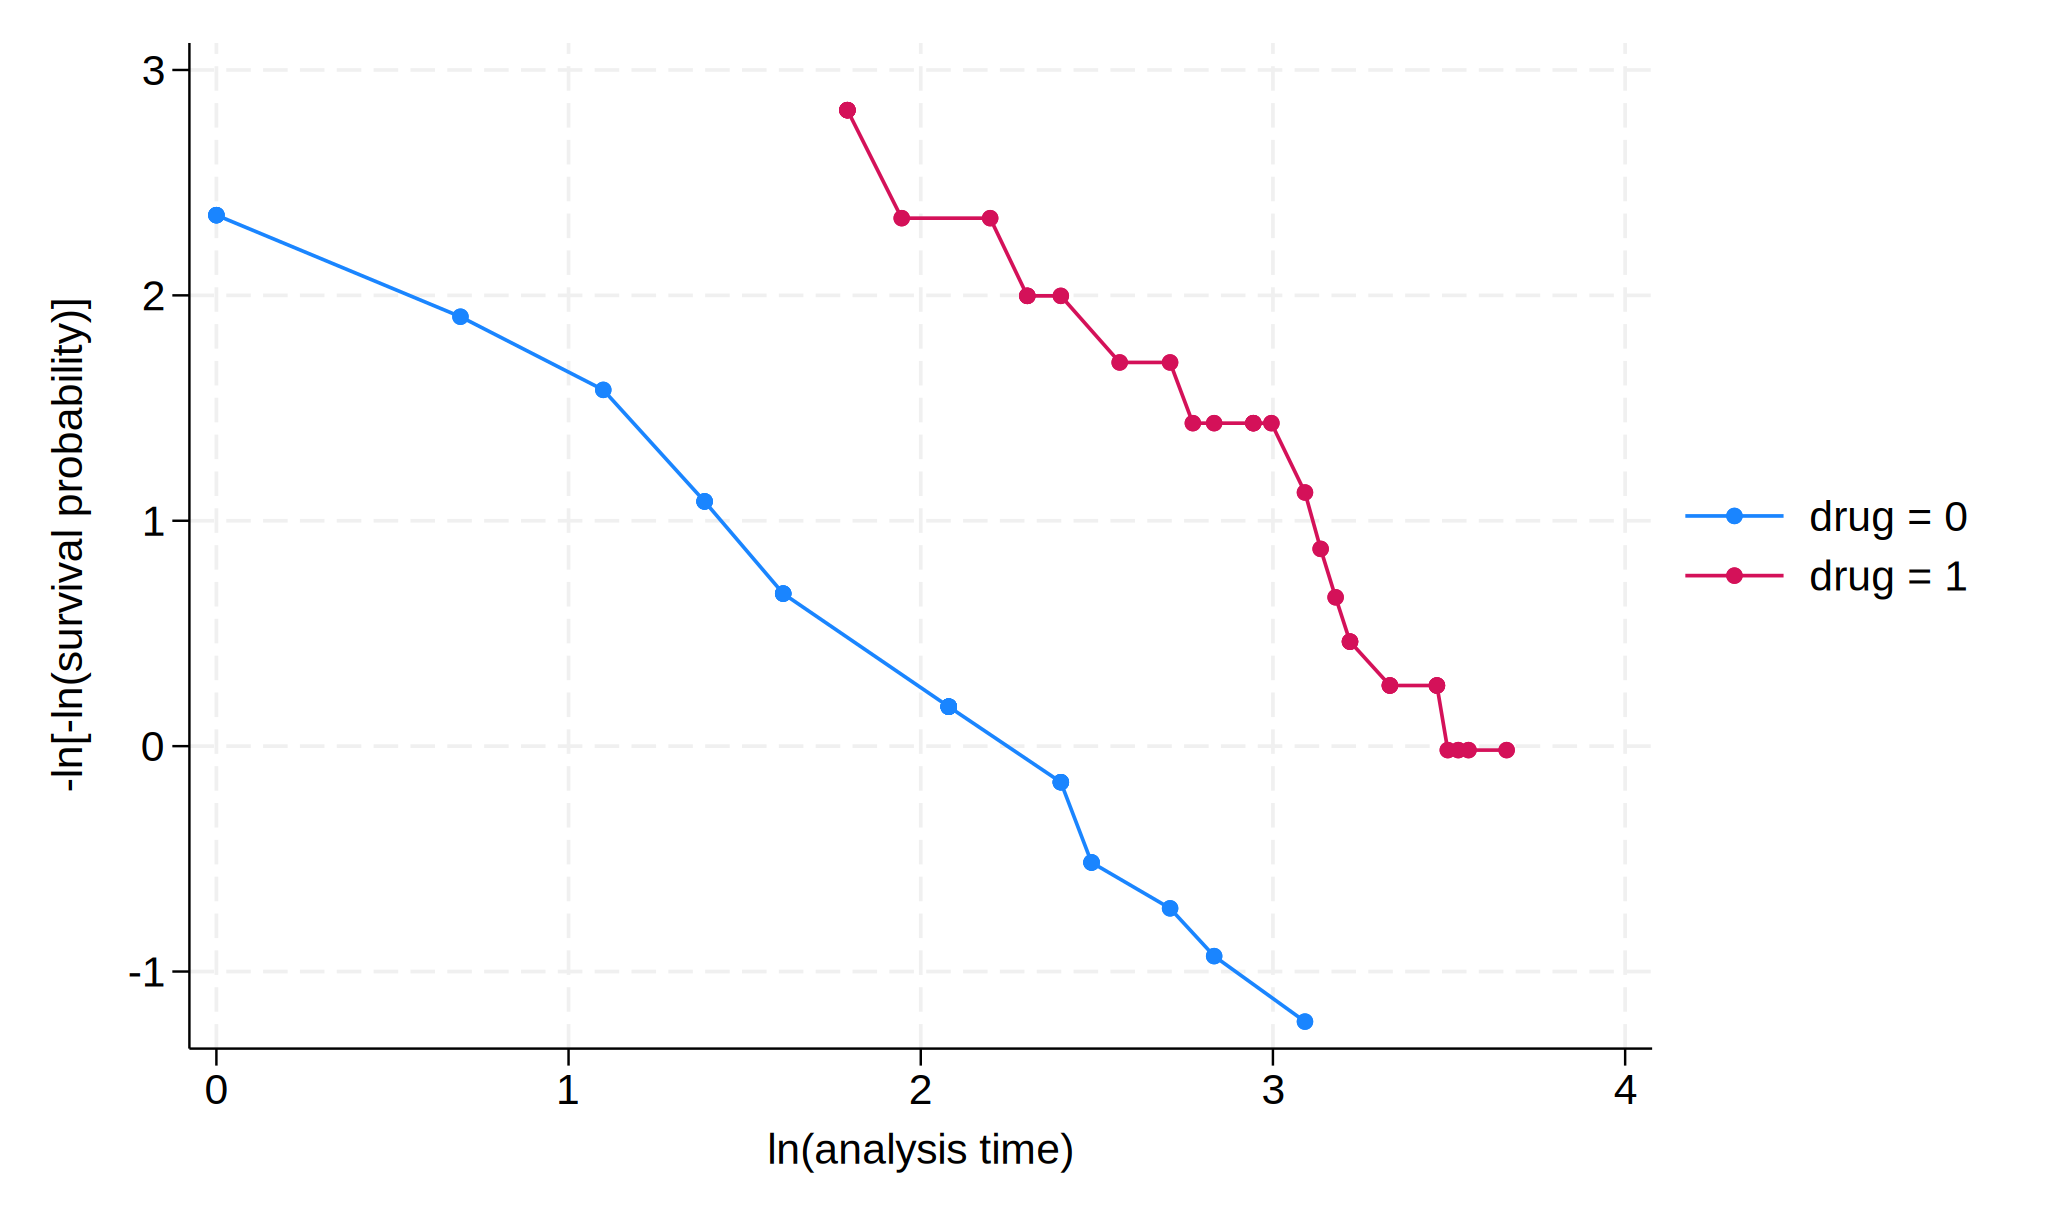

In [6]:
%%stata
stphplot,by(drug) adjust(age)

### 如果不满足PH假定

1. 一般只要两组生存曲线趋势一致、不明显交叉即可判定PH假定成立
2. 如果PH假定不成立，可以加上时间(time)和暴露
(exposure,比如本例之中的drug)的交互项(interaction term), time*exposure
3. 也可以对于不同的时间段分别分析(e.g.0-10，10-20,>20)
4. 参数生存分析模型:`streg`进行参数生存分析

